In [338]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [339]:
df = pd.read_csv("titanic.csv")
df1 = pd.read_csv("test.csv")



In [340]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [341]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [346]:
cols = ['Age', 'Pclass', 'SibSp',
       'Parch', 'Sex','Embarked']
n_rows = 2
n_cols = 3

figure, axe = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3, 2, n_rows * 3.2) )
for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c
        ax = axs[r][c]
        sns.countplot(df[cols[i]],hue=df['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title= 'Survived', loc = 'upper right')
plt.show()

TypeError: from_bounds() takes 4 positional arguments but 5 were given

In [333]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [275]:
df.shape

(891, 12)

In [276]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [277]:
for val in df:
    print(df[val].value_counts())
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Carlsson, Mr. Frans Olof         1
Taussig, Mr. Emil                1
Theobald, Mr. Thomas Leonard     1
Beane, Mr. Edward                1
Moran, Miss. Bertha              1
                                ..
Maenpaa, Mr. Matti Alexanteri    1
Mionoff, Mr. Stoytcho            1
Bowen, Mr. David John "Dai"      1
Panula, Master. Juha Niilo       1
Maisner, Mr. Simon               1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    11

In [278]:
#df = df.drop('Cabin',axis=1)
df = df.dropna( subset=['Embarked','Age','Cabin'])

In [279]:
df.shape

(891, 12)

In [280]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [281]:
print(df['Sex'].unique())
print(df['Embarked'].unique())
print(df['Name'].unique())
print(df['Ticket'].unique())
print(df['Cabin'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'

In [282]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4].values)
df.iloc[:,11] = labelencoder.fit_transform(df.iloc[:,11].values)
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3].values)
df.iloc[:,8] = labelencoder.fit_transform(df.iloc[:,8].values)
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10].values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


In [284]:
print(df['Sex'].unique())
print(df['Embarked'].unique())
print(df['Name'].unique())
print(df['Ticket'].unique())
print(df['Cabin'].unique())

[1 0]
[2 0 1 3]
[108 190 353 272  15 554 515 624 412 576 727  95 729  28 840 359 682 867
 839 512 273  80 523 765 626  44 240 260 605 813 828 776 289 856 535 372
 505 134 837 589   7 827 446 456 212 697 473 604 726  38 629 594 333 246
 620 873 707 595 853 299 749 385 337 755 784 560 596 185  25 440 396 300
 376 161  87 546 778 563 127 223 842 737 519 141 386  52 255 764 259 149
 159  31 150 209 184 740 292 308 219 422 656 658 858 405 312 542 724 559
 675 552 667 882  67 417  46 645 178 826  70  24 362 551 575 848 857 588
 525 499 653 234 225 165 695 851 772 685 585 271 618 282  99 597 319 116
  32 586  29 254 580 121  68 643 532 889 612 866 287 181 767 716 186 847
  82 129 628 293 157 760  69 486 832 680 408 752 769 444 464 388 320 474
 717 650  41  76 441 700 601 698 101 823 664 136  20 579 113 495 533 611
 497 881 834 721 403 878 166 789  51   9 140  94  12 131 649 288 437 582
 375 390  72 338 791 105 306 581 379  83 531 492 243 467 339 460 754  43
 479 329 370 172 648 383 883 567 16

In [285]:
print("The percentage of 'Age' is missing values:",(df.Age.isnull().sum() / df.Age.isnull().shape[0] * 100).round(decimals=2), "%")

The percentage of 'Age' is missing values: 19.87 %


In [286]:
print(f"The feature 'Age' has {df.Age.isnull().sum()} missing values")

The feature 'Age' has 177 missing values


In [287]:
print("'Age' has {} and 'Cabin' has {} missing values".format(df.Age.isnull().sum(), df.Cabin.isnull().sum()))

'Age' has 177 and 'Cabin' has 0 missing values


In [288]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [289]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

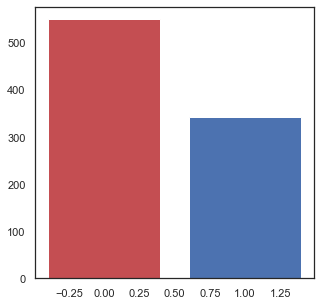

In [290]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()),color='r''b')

In [291]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

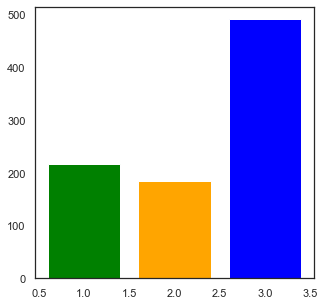

In [292]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Pclass'].value_counts().keys()),list(df['Pclass'].value_counts()),color=["blue","green","orange"])

In [293]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

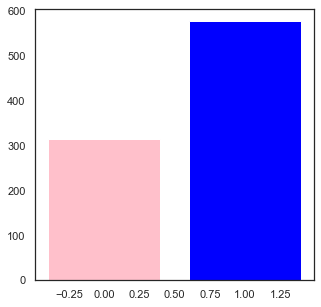

In [294]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Sex'].value_counts().keys()),list(df['Sex'].value_counts()),color=["blue","pink"])

In [295]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

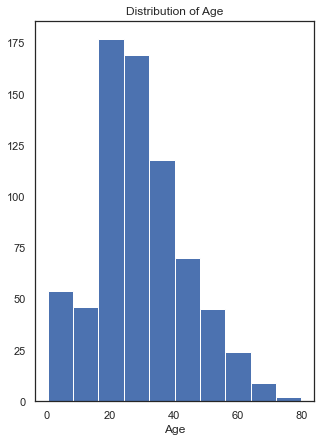

In [296]:
plt.figure(figsize=(5,7))
plt.hist(df['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

In [297]:
sum(df['Survived'].isnull())

0

In [298]:
sum(df['Age'].isnull())

177

In [299]:
df=df.dropna()

In [300]:
sum(df['Age'].isnull())

0

In [301]:
x_train = df[['Age']]
y_train = df[['Survived']]

In [302]:
from sklearn.tree import DecisionTreeClassifier

In [303]:
dtc = DecisionTreeClassifier()

In [304]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [305]:
from sklearn.model_selection import train_test_split



In [306]:
sum(df1['Age'].isnull())

86

In [307]:
df1=df.dropna()

In [308]:
sum(df1['Age'].isnull())

0

In [309]:
x_test=df1[['Age']]

In [310]:
y_pred=dtc.predict(x_test)

In [311]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [312]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.33, random_state=42)

In [313]:
train_x = train.drop(['Survived'], axis = 1)
train_y = train['Survived']             

val_x = val.drop(['Survived'], axis = 1)
val_y = val['Survived']

In [314]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (478, 11)
Dimension of train_y dataframe: (478,)
Dimension of val_x dataframe: (236, 11)
Dimension of val_y dataframe: (236,)


In [315]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [316]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 0.3074625580475069
Mean Square Error of linear regression: 0.1587903983495842
R_Squared Score of linear regression: -0.5719121798660893
